In [3]:
import random
import time
import timeit 
import matplotlib.pyplot as plt
import numpy as np
import math

![image info](lecture_problem_001.png)

In [4]:
bottles_regions = [23, 87, 12, 98, 56]
D = 1

lowest_speed = 1
highest_speed = max(bottles_regions)

def is_this_speed_possible(speed):
    days = 0
    for bottles in bottles_regions:
        days += math.ceil(bottles/speed)
    return days > D 

bottles_regions.sort() #sort the list before binary search

#need to minimize the number of random picks we make
while lowest_speed < highest_speed:
    mid = (lowest_speed + highest_speed) // 2

    #instead of comparing against mid, we use an auxiliary function to reduce the numbe rof comparions
    if is_this_speed_possible(mid):
        lowest_speed = mid + 1
    else:
        highest_speed = mid - 1
print("Lowest possible speed: ", lowest_speed)

"""
sorting was not necessary cuz it works in the same way without as well. But binary search doesn't work without sorted list.why?
because we are traversing through the speeds sequentially so we don't need to sort anything.
"""


Lowest possible speed:  98


"\nsorting was not necessary cuz it works in the same way without as well. But binary search doesn't work without sorted list.why?\nbecause we are traversing through the speeds sequentially so we don't need to sort anything.\n"

In [5]:
def create_list_custom(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0,max_value) for i in range(length)]
    if item!= None:
        random_list.insert(item_index,item)
    return random_list

create_list_custom(10,1000,10,6)

[444, 846, 760, 906, 773, 678, 10, 735, 210, 685, 123]

In [6]:
def draw_show_plot(run_arr):
    x = np.arange(0, len(run_arr),1)
    fig=plt.figure(figsize=(20,8))
    plt.bar(x,run_arr)
    plt.axhline(np.mean(run_arr),color="red",linestyle="--",label="Avg")
    plt.xlabel("Iterations")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.title("Run time for retrieval")
    plt.show()

## Bubble Sort

In [7]:
def bubble_sort(data):
    for iteration in range(len(data)-1, 0, -1):
        for index in range(iteration):
            if data[index] > data[index+1]:
                data[index],data[index+1]=data[index+1],data[index]

In [8]:
def bubble_sort_II(data):
    no_more_swap =True
    while no_more_swap:
        no_more_swap = False
        for iteration in range(len(data)-1, 0, -1):
            for index in range(iteration):
                if data[index] > data[index+1]:
                    data[index],data[index+1]=data[index+1],data[index]

[64, 37, 34, 43, 47, 17, 66, 20, 53, 3]


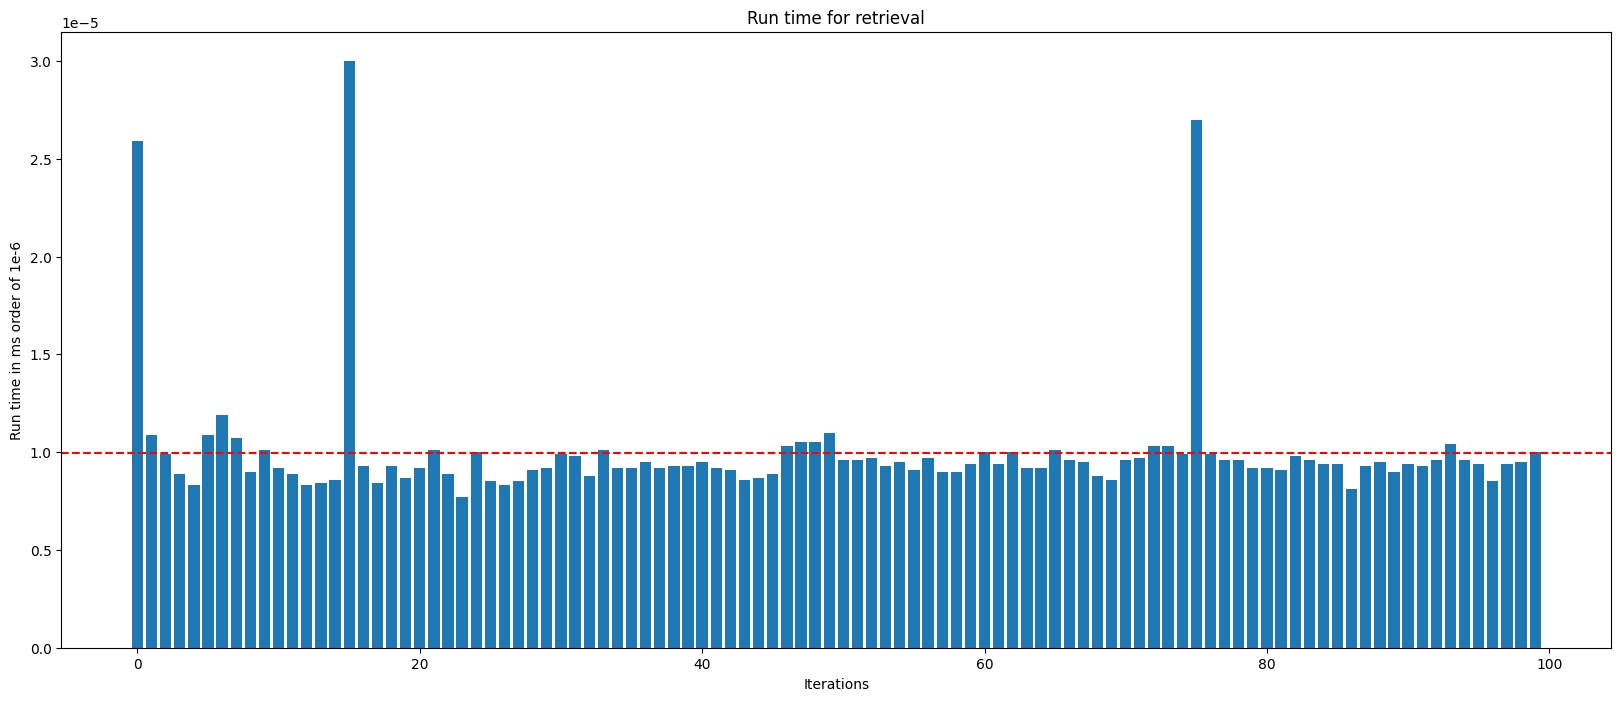

In [9]:
runs = 100
run_times = []
my_list=create_list_custom(10,100)
print(my_list)
for _ in range(runs):
    start = timeit.default_timer()
    found = bubble_sort(my_list)
    stop = timeit.default_timer()
    run_times.append(stop-start)

draw_show_plot(run_times)

[10, 69, 38, 80, 89, 4, 81, 14, 9, 84]


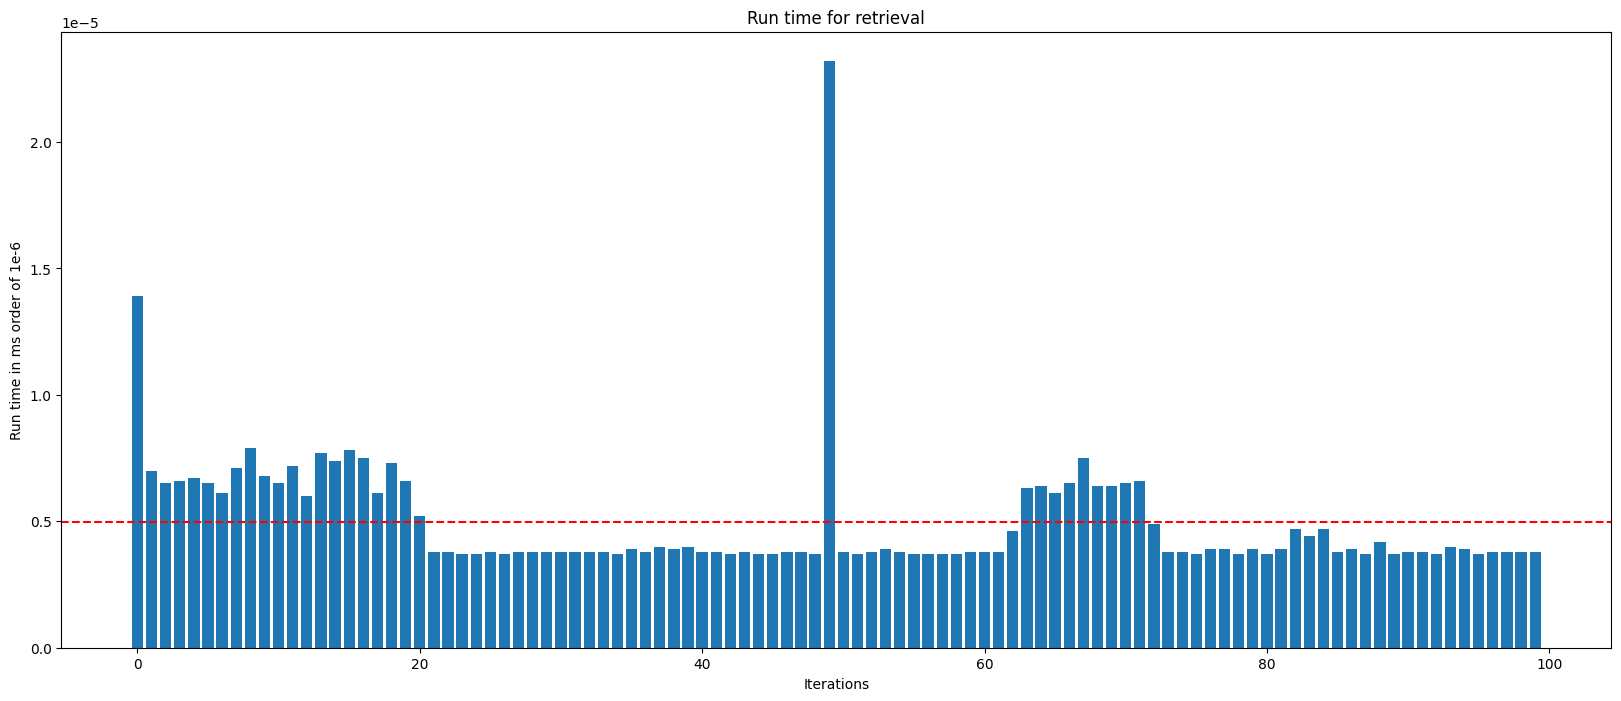

In [10]:
runs = 100
run_times = []
my_list=create_list_custom(10,100)
print(my_list)
for _ in range(runs):
    start = timeit.default_timer()
    found = bubble_sort_II(my_list)
    stop = timeit.default_timer()
    run_times.append(stop-start)

draw_show_plot(run_times)

## Insertion Sort

In [11]:
items=create_list_custom(10,100)
items

[42, 33, 1, 29, 30, 89, 0, 59, 93, 89]

In [12]:
def insertion_sort_I(data):
    for index in range(1, len(data)):
        while index > 0 and data[index] < data[index-1]: #data[index] < data[index-1] makes sure that the last item in the list is the highest 
            data[index],data[index-1]=data[index-1],data[index]
            index -= 1 

In [13]:
# to improve, look for comparisons and look for where you are using operations
# always aim to reduce comparisions or increase the numbe rof operations
def insertion_sort_II(data):
    for index in range(1, len(data)):
        lowest_value = data[index]
        while index > 0:
            if data[index - 1] > lowest_value:
                data[index] = data[index - 1]
                index -= 1
            else:
                data[index] = lowest_value
                break
        if index == 0:
            data[index] = lowest_value

### Experiments

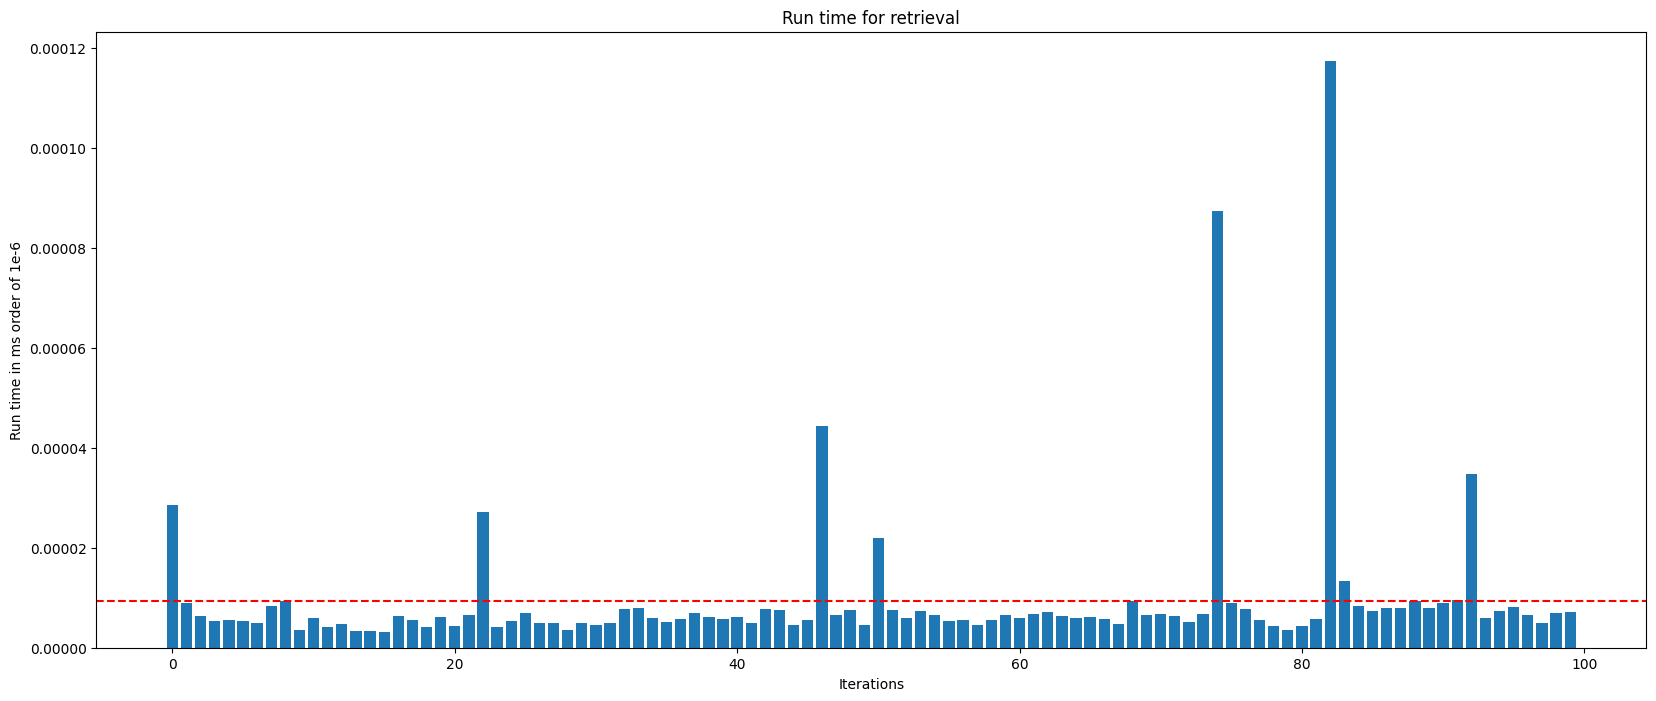

In [14]:
runs = 100
run_times = []
#my_list=create_list_custom(10,100)
#print(my_list)
for _ in range(runs):
    my_list=create_list_custom(10,100)
    start = timeit.default_timer()
    insertion_sort_I(my_list)
    stop = timeit.default_timer()
    run_times.append(stop-start)

draw_show_plot(run_times)

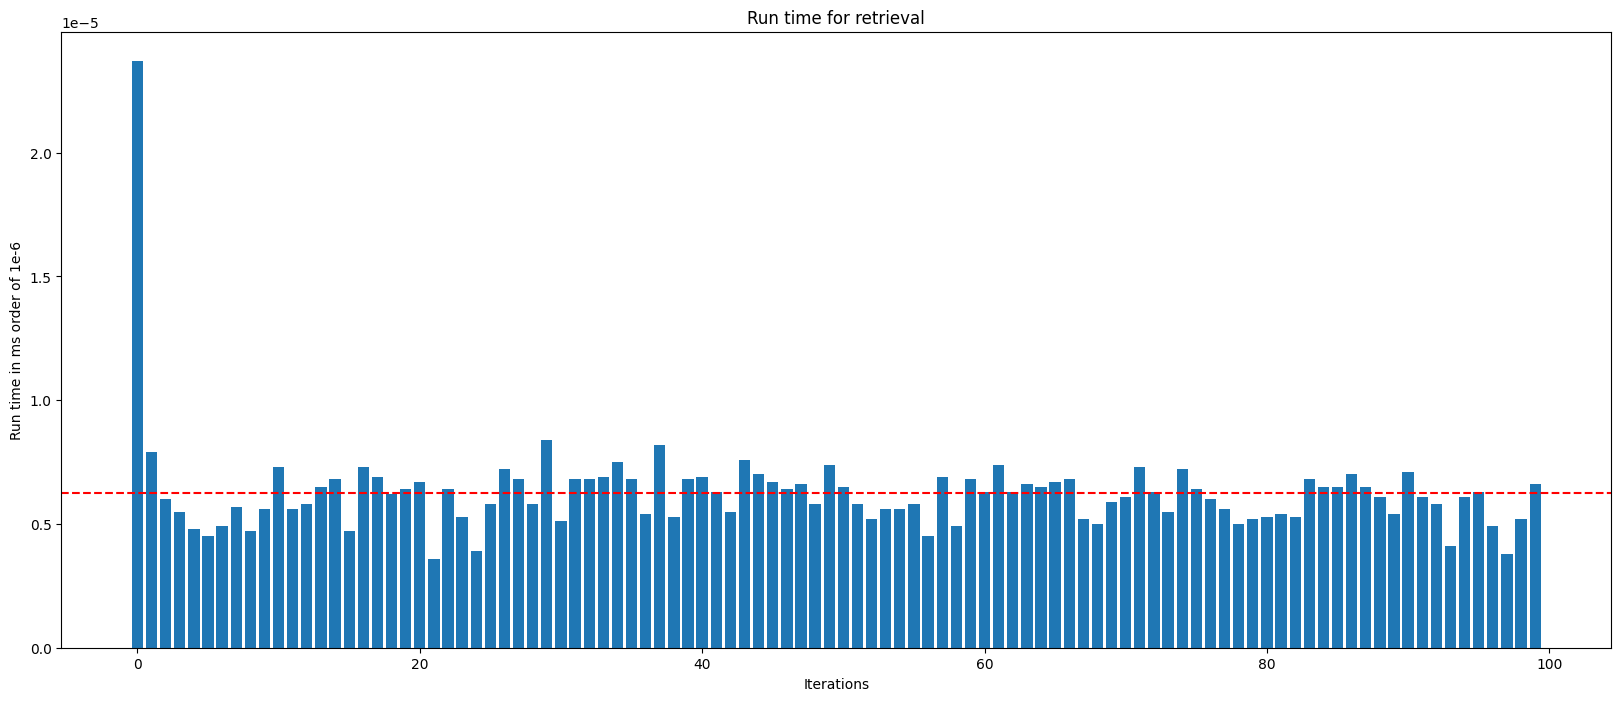

In [15]:
runs = 100
run_times = []
#my_list=create_list_custom(10,100)
#print(my_list)
for _ in range(runs):
    my_list=create_list_custom(10,100)
    start = timeit.default_timer()
    insertion_sort_II(my_list)
    stop = timeit.default_timer()
    run_times.append(stop-start)

draw_show_plot(run_times)

In [16]:
"""
insertion sort mostly focuses on:
1. where to insert
2. which way to traverse

try to incorporate binary search in this process.

Binary insertion sort
"""

def binary_search(item_list, to_find, lower, upper):
    #where to insert, below or above the boundary (base case in recursion)
    # finding the mid position in context to insertion sort and not in binary search
    if lower == upper:
        if item_list[lower] > to_find:
            return lower
        else:
            return lower + 1
        
    # where are we moving, is left the least
        
    if lower > upper:
        return lower
    
    mid = (lower + upper)//2

    if item_list[mid] < to_find:
        return binary_search(item_list, to_find, mid + 1, upper)
    elif item_list[mid] > to_find:
        return binary_search(item_list, to_find, lower, mid - 1)
    else:
        return mid
    
def insertion_sort_III(items):
    for index in range(1, len(items)):
        curr_value = items[index]
        insert_index = binary_search(items, curr_value, 0 , index -1)
        items = items[: insert_index] + [curr_value] + items[insert_index: index] + items[index+1:]
    return items

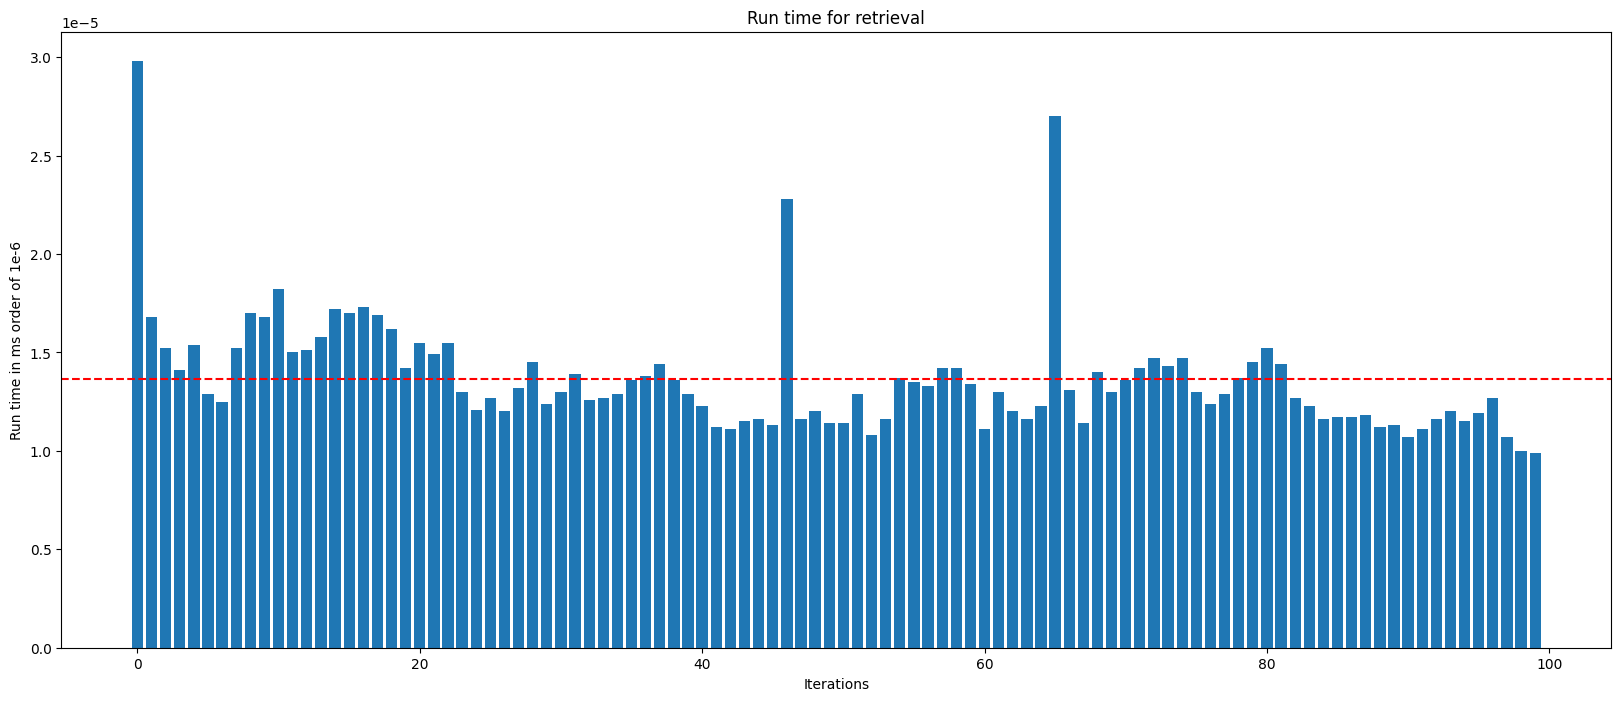

In [17]:
runs = 100
run_times = []
#my_list=create_list_custom(10,100)
#print(my_list)
for _ in range(runs):
    my_list=create_list_custom(10,100)
    start = timeit.default_timer()
    insertion_sort_III(my_list)
    stop = timeit.default_timer()
    run_times.append(stop-start)

draw_show_plot(run_times)